ML HW2

Mohammadreza Mohammadzadeh Asl

Student id: 98243097

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# read train dataset
reading train dataset from file and calculating min and max for 'Year' and 'Mileage' columns which we will use later for normalizing.
we can also remove the duplicates row from our dataframe.

In [ ]:
df = pd.read_csv('train.csv')

min_year, max_year = df['Year'].min(), df['Year'].max()
min_mileage, max_mileage = df['Mileage'].min(), df['Mileage'].max()

#df.drop_duplicates()

# dataset analysis
using pandas profile to see an analysis for dataset before training the model

In [ ]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Vin column
all values in the `vin` column are distinct so we don't use this column as feature for our model.

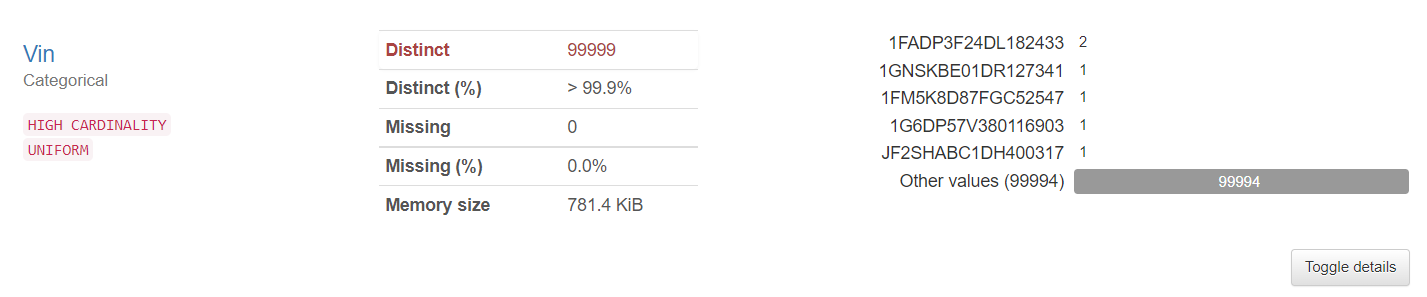

# target relation with 'state'

as we see the plot here, in some states the price range differs from others and the expensive cars are more likely in some specific states.

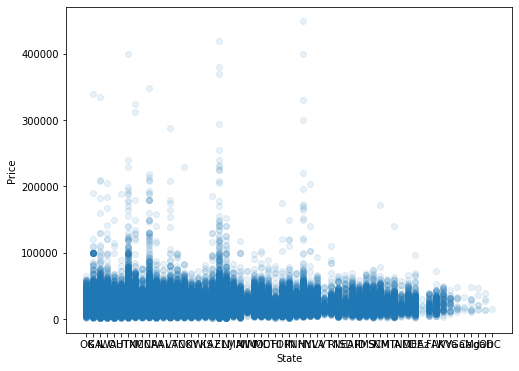

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('State')
ax.set_ylabel('Price')

ax.scatter(df['State'], df['Price'], alpha=.1)

# target relation with 'city'

as we see the plot here, the relation between price and city is very small to no. the `city` column is non numerical so we need to use one hot encoding for that if we want to use it in our model. it has 2524 distinct values and the effect is very small to no so we decide to not use `city` as feature in our model.

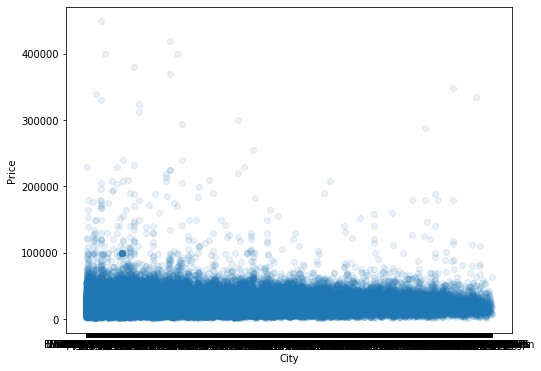

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('City')
ax.set_ylabel('Price')

ax.scatter(df['City'], df['Price'], alpha=.1)

# normalizing
as we noticed in the analysis section the 'City' and 'Vin' columns should not be used to train our model so we drop these columns from our dataframe. also we want to have 0-1 range for 'Year' and 'Mileage' Columns so we use this formula:
$$x = \frac{x-x.min()}{x.max()-x.min()}$$
where we have calculated min and max for these columns before.

In [ ]:
def normalize(df):
    df = df.drop(columns=['Vin'])
    df = df.drop(columns=['City'])
    df['Year'] = (df['Year']- min_year) / (max_year - min_year)
    df['Mileage'] = (df['Mileage']- min_mileage) / (max_mileage - min_mileage)

    return df

One Hot Encoding
for some columns we have non numeral values. in regression we need features to be numeral so we use one hot encoding for those columns. hopefuly pandas has a `get_dummies` method which calculates replace those columns with their one hot encoding.

In [ ]:
def format_train(df):
    df = normalize(df)
    df = pd.get_dummies(df)
    print(df.shape)
    return df

df = format_train(df)
df

(100000, 2212)


,Price,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ Az,State_ CA,State_ CO,...,Model_tCAutomatic,Model_tCManual,Model_xA4dr,Model_xB5dr,Model_xB686,Model_xBAutomatic,Model_xBManual,Model_xD5dr,Model_xDAutomatic,Model_xDManual
0,29495,0.761905,0.073116,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35969,0.904762,0.031795,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21477,0.904762,0.040650,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13889,0.857143,0.041641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14225,0.904762,0.033530,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12988,0.476190,0.026121,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,22700,0.952381,0.011006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,6988,0.047619,0.112082,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,23777,0.714286,0.097634,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# cost function
we define our cost function as MSE:

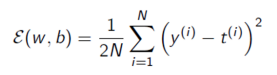

In [ ]:
def cost(y, t):
    N = np.shape(y)[0]
    return 1.0/(2*N)* np.sum(np.square(y-t))

# Gradient descent
here `iteration` is number of intertion for training the model,
`a` is the alpha or learning rate
and `thr` is the threshold for stopping the algorithm.

we save number of samples and number of features in `N` and `F` respectly.
the intialization value for `b` is zero and for `w` is vector of zeros.

we calculate our prediction as `y = xw + b`.
also we save the previous iteration cost in variable `pre_cost` and current iteration cost in variable `cur_cost`.

we need to calculate gradient for `w` and `b` so we have:

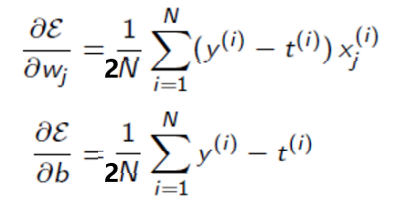

we save gradients in vectors `w_grad` and `b_grad` so we can use it to update our weights vector from that:
$$ w = w - a \frac{∂ε}{∂w} $$

In [ ]:
def gradient_descent(x, t, iterations=400, a= 0.75,  thr= 1e-6):
    N= np.shape(x)[0]
    F= np.shape(x)[1]
    b= 0
    w= np.zeros((F, 1))

    pre_cost = None
    cost_plt_y = []
    cost_plt_x = []
    for it_number in range(iterations):
        y = np.dot(x, w) + b
        cur_cost = cost(y, t)

        #in our model because of small number of iteration model doesn't reach to
        #that step where it knows it had converged but we write that in general anyway
        if pre_cost and abs(pre_cost-cur_cost)<=thr:
            break
         
        pre_cost = cur_cost

        w_grad = (1.0/(2.0*N)) * np.dot(x.T, y-t)
        b_grad = (1.0/(2.0*N)) * np.sum(y- t)
        w = w - a * w_grad
        b = b - a * b_grad

        print("iteration {},  cost is {}".format(it_number, cost(y, t)))
        cost_plt_x.append(it_number)
        cost_plt_y.append(cost(y, t))
    return w, b, cost_plt_x, cost_plt_y

# Feature map
we have implemented the linear regression and we only need to use feature map to have polynomial regression.
for that purpose we add columns data to the power of less than or equal to i to the dataframe.
note that for the columns which we use one hot encoding we don't need to do this because 0 and 1 to the power of ith will remain the same as before.
so we only do that for the `Year` and `Mileage` columns.

In [ ]:
def feat_map(df, poly=3):
    new_x = df
    df = df[['Year', 'Mileage']]
    f_list = list(df)
    for i in range(2, poly+1):
        poly_i = df ** i
        poly_i = poly_i.add_prefix('poly_{}_'.format(i))
        new_x = pd.concat([new_x, poly_i], axis=1)
    return new_x

# prepare x and t vectors
we calculate x vector from our dataframe by dropping the `Price` column.
also we store `features` list for later use.

now our model can be trained and we save the result in `w` and `b`.

In [ ]:
features = list(df.drop(columns=['Price']))
print(features)
t = df[['Price']].to_numpy()
x_learn = df[features].to_numpy()

w, b, cost_plt_x, cost_plt_y = gradient_descent(x_learn, t)

['Year', 'Mileage', 'State_ AK', 'State_ AL', 'State_ AR', 'State_ AZ', 'State_ Az', 'State_ CA', 'State_ CO', 'State_ CT', 'State_ Ca', 'State_ DC', 'State_ DE', 'State_ FL', 'State_ Fl', 'State_ GA', 'State_ Ga', 'State_ HI', 'State_ IA', 'State_ ID', 'State_ IL', 'State_ IN', 'State_ KS', 'State_ KY', 'State_ LA', 'State_ MA', 'State_ MD', 'State_ ME', 'State_ MI', 'State_ MN', 'State_ MO', 'State_ MS', 'State_ MT', 'State_ Md', 'State_ NC', 'State_ ND', 'State_ NE', 'State_ NH', 'State_ NJ', 'State_ NM', 'State_ NV', 'State_ NY', 'State_ OH', 'State_ OK', 'State_ OR', 'State_ Oh', 'State_ PA', 'State_ RI', 'State_ SC', 'State_ SD', 'State_ TN', 'State_ TX', 'State_ UT', 'State_ VA', 'State_ VT', 'State_ Va', 'State_ WA', 'State_ WI', 'State_ WV', 'State_ WY', 'State_ ga', 'Make_AM', 'Make_Acura', 'Make_Alfa', 'Make_Aston', 'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_FIAT', 'Make_Ferrari', 'Make_Ford'

# Cost Plot

as we can see our cost decreases over iterations.

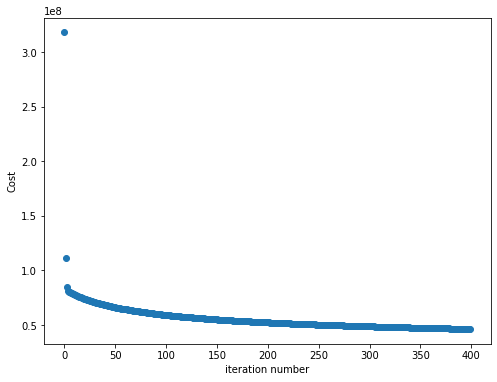

In [ ]:
def plt_cost(x, y):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('iteration number')
    ax.set_ylabel('Cost')

    ax.scatter(x, y)

plt_cost(cost_plt_x, cost_plt_y)

# read tests
we read test dataset from `test.csv` and we normalize it.
then we calculate the appropriate `x` vector for test dataframe.

we should note that while we are using one hot encoding for our model the columns are based on training dataset so by using `pd.get_dummies(x)` we don't get the vector that we want. we need to remove columns which aren't in the training dataframe and also add training dataframe columns which aren't in the test dataframe so we have the same columns for x.

after that we need to make sure that the columns are in the same order as we have used to train the model. so we reindex the `x` dataframe with the feature list we had from training section.

In [ ]:
test_df = pd.read_csv('test.csv')
def format_test(test_df):
    test_df = normalize(test_df)

    if 'CarId' in test_df:
        x = test_df.drop(columns=['CarId'])
    else:
        x = test_df

    x = pd.get_dummies(x)
    test_features = list(x)

    to_drop = list(set(test_features) - set(features))
    x.drop(columns= to_drop)

    to_add = list(set(features) - set(test_features))
    x[to_add] = 0

    x = x.reindex(features, axis=1)
    return x

x = format_test(test_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


# predict test target
we already have our model in `w` vector and `b`.
to predict the target we only have to calculate `y = xw + b`.

then we store our prediction in csv file to submit in the kaggle :).

In [ ]:
y = np.dot(x, w) + b

ans_linear = pd.DataFrame()
ans_linear['CarId'] = test_df['CarId']
ans_linear['Price'] = y


ans_linear.to_csv('linear_ans.csv', index=False)
ans_linear.head()

,CarId,Price
0,0,19677.339397
1,1,26127.596188
2,2,21065.911818
3,3,29331.372330
4,4,21537.770210


# read polynomial datasets

In [ ]:
df = pd.read_csv('poly_data.csv')
rows= df.shape[0]

import math
test_df = df.iloc[math.floor(0.6*rows):,:]
df = df.iloc[:math.floor(0.6*rows),:]
test_df = test_df.drop(columns=['Price'])
t = df[['Price']].to_numpy()

min_year, max_year = df['Year'].min(), df['Year'].max()
min_mileage, max_mileage = df['Mileage'].min(), df['Mileage'].max()

df = format_train(df)
features = list(df.drop(columns=['Price']))
x_test = format_test(test_df)
print(x_test.shape)
x_test

(2579, 57)
(1720, 56)


,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DE,...,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY,Make_Chevrolet,Model_Silverado
2579,0.888889,0.025137,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2580,0.944444,0.021614,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2581,0.888889,0.024019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2582,0.833333,0.052692,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2583,0.888889,0.031337,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,0.777778,0.066245,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4295,0.888889,0.022995,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4296,0.833333,0.086968,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4297,0.666667,0.141116,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# Polynomial regression
we have implemented the feature map and gradiant functions before.
we only need to use them :)
the algorithm is same is the previous block and we only use `poly_variables`.

In [ ]:
x_poly_test = feat_map(x_test)
print(x_poly_test.shape)
x_poly_learn = feat_map(df[features]).to_numpy()
w_poly, b_poly, cost_plt_x, cost_plt_y = gradient_descent(x_poly_learn, t)

y_poly = np.dot(x_poly_test, w_poly) + b_poly

ans_poly = pd.DataFrame()
ans_poly['Price'] = y_poly.reshape(-1)

ans_poly.to_csv('poly_ans.csv', index=False)
ans_poly.head()

(1720, 60)
iteration 0,  cost is 488510467.38038
iteration 1,  cost is 227693899.86693445
iteration 2,  cost is 116213557.19105768
iteration 3,  cost is 68304802.33291262
iteration 4,  cost is 47479676.84021126
iteration 5,  cost is 38212823.095960945
iteration 6,  cost is 33896655.21075772
iteration 7,  cost is 31717467.112021957
iteration 8,  cost is 30475707.91061671
iteration 9,  cost is 29658707.27837609
iteration 10,  cost is 29046194.506652925
iteration 11,  cost is 28542469.4489905
iteration 12,  cost is 28104992.5593029
iteration 13,  cost is 27713992.903539833
iteration 14,  cost is 27359526.40838782
iteration 15,  cost is 27035958.535496455
iteration 16,  cost is 26739606.310324144
iteration 17,  cost is 26467725.260388352
iteration 18,  cost is 26218069.320539463
iteration 19,  cost is 25988695.249935288
iteration 20,  cost is 25777871.770710263
iteration 21,  cost is 25584033.902026147
iteration 22,  cost is 25405757.11239095
iteration 23,  cost is 25241740.444810513
itera

,Price
0,33686.723336
1,40115.237176
2,34799.128496
3,33020.896072
4,32057.425941


# Polynomial Cost Plot
as we can see our cost decreases over iterations.

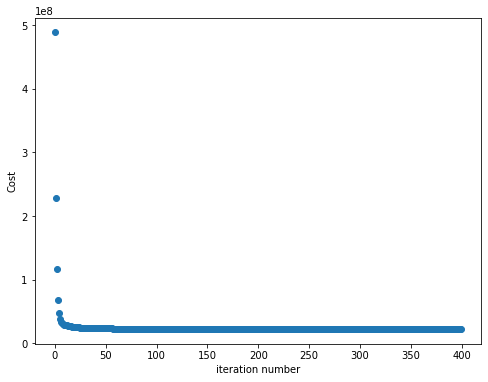

In [ ]:
plt_cost(cost_plt_x, cost_plt_y)